In [1]:
# 원본 Train용 cropped 이미지를 train set과 validation set으로 분리 및 생성 
#    - test set으로는 원본 validation용 cropped 이미지를 사용
#    - 원본 test용 이미지는 사용하지 않기로 함
# 원본 Validation용 cropped 이미지로 test dataset 생성
'''
    - input
        - train용 cropped 이미지 파일 (Dataset/train/train/cropped_image)
        
    - output
        - train image set:       X_train_image.pickle (Dataset/pickle)
        - validation image set:  X_valid_image.pickle (Dataset/pickle)
        - test image set:        X_test_image.pickle (Dataset/pickle)
        
    - split 기준
        - Category별로 test:validation = 8:2 => test_size (= 0.2) 변경 가능
        - sklearn train_test_split 함수의 stratify 옵션 사용
'''

import os
from tqdm import tqdm
import pickle
from sklearn.model_selection import train_test_split

# 생성되는 pickle 파일 저장 폴더 지정
pickle_file_folder = "./Dataset/pickle/"
if not os.path.isdir(pickle_file_folder):
    os.mkdir(pickle_file_folder)

####################################################################################################
# Train 폴더의 cropped image로 train, validation image set 만들기
####################################################################################################

# Train cropped 이미지 폴더 지정
train_cropped_image_folder = "./Dataset/train/train/cropped_image/"

# train cropped image folder에서 파일을 읽어서 파일 목록 생성
train_cropped_file_list = os.listdir(train_cropped_image_folder)

# 생성된 파일 목록을 가지고, category_id 기준으로 train:valid (= 80%:20%) set으로 split (비율 변경 가능)

# 전체 이미지 리스트 만들기
#    - category별로 비율을 맞추기 위해 전체 파일 리스트를 만들 때 요소를 나누어서 만듦
#    - 리스트 요소 = 딕셔너리 {index(추가), 파일 이름 요소들}
#    - filename = pair_id + style + source + original_filename + item# + category_id + .jpg
all_image_list = []
for idx, a_file in tqdm(enumerate(train_cropped_file_list)):
    temp = a_file.split('_')
    all_image_list.append({'idx': idx, 'pair_id':temp[0], 'style':temp[1], 'source':temp[2],
                             'filename':temp[3],'item_no':temp[4], 'category_id':temp[5][:-4]})

# train, validation set으로 split
X = all_image_list
y = list([i['category_id'] for i in all_image_list])   # split 기준으로 사용하기 위해 생성

test_size = 0.2

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, stratify=y)

# Save pickle
with open (pickle_file_folder + "X_train_image.pickle", "wb") as fw:  # train용 이미지 파일
    pickle.dump(X_train, fw)
with open (pickle_file_folder + "X_valid_image.pickle", "wb") as fw:  # validation용 이미지 파일
    pickle.dump(X_valid, fw)

####################################################################################################
# Validation 폴더의 cropped image로 test image set 만들기
####################################################################################################

# Validation cropped 이미지 폴더 지정
val_cropped_image_folder = "./Dataset/validation/validation/cropped_image/"

# 각각의 Cropped image folder에서 파일을 읽어서 파일 목록 생성
test_file_list = os.listdir(val_cropped_image_folder)

test_image_list = []
# test_image_list 만들기
for idx, a_file in tqdm(enumerate(test_file_list)):
    temp = a_file.split('_')
    test_image_list.append({'idx': idx, 'pair_id':temp[0], 'style':temp[1], 'source':temp[2],
                             'filename':temp[3],'item_no':temp[4], 'category_id':temp[5][:-4]})

# Save pickle
with open (pickle_file_folder + "X_test_image.pickle", "wb") as fw:  # test용 이미지 파일
    pickle.dump(test_image_list, fw)

print("Save test, validation and test images... finished!")
print("# of train images:", len(X_train))
print("# of validation images:", len(X_valid))
print("# of test images:", len(test_image_list))

312185it [00:00, 1236820.91it/s]
52490it [00:00, 585249.13it/s]

Save test, validation and test images... finished!
# of train images: 249748
# of validation images: 62437
# of test images: 52490


312185
000001_00_user_000001_item2_08.jpg


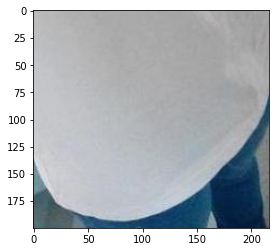

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

# train cropped image folder에서 파일을 읽어서 파일 목록 생성
# train_cropped_file_list = os.listdir(train_cropped_image_folder)

print(len(train_cropped_file_list))
print(train_cropped_file_list[0])

# 이미지 디스플레이
image_1 = Image.open(train_cropped_image_folder + train_cropped_file_list[0])
plt.imshow(image_1, cmap="gray")
plt.show()